In [1]:
import pandas as pd
# BASIC DS LIBS
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# FILE IO LIBS
import os 
from os.path import join 

# GEOSPATIAL LIBS
from osgeo import gdal
import geopandas as gpd
from geopandas import GeoDataFrame

# PLOT LIBS
import plotly.express as px 
import plotly.graph_objects as go
from shapely.geometry import Point
from plotly.subplots import make_subplots
gun_data = pd.read_csv('Rochester_NY_Shooting_Victims.csv')

In [2]:
from geopy.geocoders import Nominatim

In [3]:
gun_2022 = gun_data[gun_data["Occurred_Year"] == 2022]

In [4]:
t = gun_2022["Occurred_Year"] == 2022

In [5]:
t.unique()

array([ True])

In [6]:
gun_2023 = gun_data[gun_data["Occurred_Year"] == 2023]

In [7]:
gun_2023

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId


In [8]:
gun_2022

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.610890,43.184163,7b9b3c9f85a442ce6a0aa2433ab8614f,22-109240,442 Remington St,2022/06/01 04:00:00+00,6,2022,Shooting,No,M,WHITE,HISPANIC,34,25-44,43.184163,-77.610890,1
1,-77.598893,43.181793,82e3549d4dc8a835dea7130df2dcc851,22-106950,904 Hudson Ave,2022/05/29 04:00:00+00,5,2022,Homicide,No,M,WHITE,HISPANIC,42,25-44,43.181793,-77.598893,2
2,-77.630378,43.142970,bb9b98f90af42194e3a5b12a1ba8405f,22-106780,168 Bartlett St,2022/05/29 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,60,45-Older,43.142970,-77.630378,3
3,-77.580628,43.167216,dd0ab9214578b6e0d35467f6bb7b0fc3,22-106380,720 N Goodman St,2022/05/28 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,28,25-44,43.167216,-77.580628,4
4,-77.641972,43.162394,5aac53d1517de031545f178e919c35b8,22-104298,138 Murray St,2022/05/26 04:00:00+00,5,2022,Shooting,No,M,WHITE,HISPANIC,15,15-24,43.162394,-77.641972,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-77.594208,43.176265,170cc2716dcda68d990e13f160eb8e6d,22-002983,367 Alphonse St,2022/01/05 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,45,45-Older,43.176265,-77.594208,433
433,-77.653647,43.145521,8413049a1673e7652bc9a496b9822f8b,22-002302,211 Depew St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,43,25-44,43.145521,-77.653647,434
434,-77.632012,43.160080,1cb272c96a18d27465d921e5df6df93a,22-002409,290 Saxton St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,15,15-24,43.160080,-77.632012,435
435,-77.603917,43.159877,11e489af1ae332d6ea0af7061c782115,22-001016,125 North St,2022/01/02 05:00:00+00,1,2022,Homicide,No,M,BLACK,NON HISPANIC,14,14-May,43.159877,-77.603917,436


In [9]:
gun_2022_23 =  pd.concat([gun_2022, gun_2023])

In [10]:
gun_2022_23

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.610890,43.184163,7b9b3c9f85a442ce6a0aa2433ab8614f,22-109240,442 Remington St,2022/06/01 04:00:00+00,6,2022,Shooting,No,M,WHITE,HISPANIC,34,25-44,43.184163,-77.610890,1
1,-77.598893,43.181793,82e3549d4dc8a835dea7130df2dcc851,22-106950,904 Hudson Ave,2022/05/29 04:00:00+00,5,2022,Homicide,No,M,WHITE,HISPANIC,42,25-44,43.181793,-77.598893,2
2,-77.630378,43.142970,bb9b98f90af42194e3a5b12a1ba8405f,22-106780,168 Bartlett St,2022/05/29 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,60,45-Older,43.142970,-77.630378,3
3,-77.580628,43.167216,dd0ab9214578b6e0d35467f6bb7b0fc3,22-106380,720 N Goodman St,2022/05/28 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,28,25-44,43.167216,-77.580628,4
4,-77.641972,43.162394,5aac53d1517de031545f178e919c35b8,22-104298,138 Murray St,2022/05/26 04:00:00+00,5,2022,Shooting,No,M,WHITE,HISPANIC,15,15-24,43.162394,-77.641972,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,-77.594208,43.176265,170cc2716dcda68d990e13f160eb8e6d,22-002983,367 Alphonse St,2022/01/05 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,45,45-Older,43.176265,-77.594208,433
433,-77.653647,43.145521,8413049a1673e7652bc9a496b9822f8b,22-002302,211 Depew St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,43,25-44,43.145521,-77.653647,434
434,-77.632012,43.160080,1cb272c96a18d27465d921e5df6df93a,22-002409,290 Saxton St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,15,15-24,43.160080,-77.632012,435
435,-77.603917,43.159877,11e489af1ae332d6ea0af7061c782115,22-001016,125 North St,2022/01/02 05:00:00+00,1,2022,Homicide,No,M,BLACK,NON HISPANIC,14,14-May,43.159877,-77.603917,436


In [11]:
gun_long=gun_2022_23["Longitude"]

In [12]:
gun_lat = gun_2022_23["Latitude"]

In [13]:
gun_lat = gun_lat.tolist()

In [14]:
gun_long = gun_long.tolist()

In [15]:
zipcode=[]

In [16]:
geolocator = Nominatim(user_agent='myapplication')

In [17]:

for i in range(len(gun_lat)):
    location = geolocator.reverse((gun_lat[i],gun_long[i]),timeout=10)
    address = location.raw['address']
    zipcode.append(address.get('postcode')) 
   

In [18]:
len(zipcode)

137

In [19]:
gun_2022_23 = gun_2022_23.reset_index(drop=True)


In [20]:
gun_2022_23

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.610890,43.184163,7b9b3c9f85a442ce6a0aa2433ab8614f,22-109240,442 Remington St,2022/06/01 04:00:00+00,6,2022,Shooting,No,M,WHITE,HISPANIC,34,25-44,43.184163,-77.610890,1
1,-77.598893,43.181793,82e3549d4dc8a835dea7130df2dcc851,22-106950,904 Hudson Ave,2022/05/29 04:00:00+00,5,2022,Homicide,No,M,WHITE,HISPANIC,42,25-44,43.181793,-77.598893,2
2,-77.630378,43.142970,bb9b98f90af42194e3a5b12a1ba8405f,22-106780,168 Bartlett St,2022/05/29 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,60,45-Older,43.142970,-77.630378,3
3,-77.580628,43.167216,dd0ab9214578b6e0d35467f6bb7b0fc3,22-106380,720 N Goodman St,2022/05/28 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,28,25-44,43.167216,-77.580628,4
4,-77.641972,43.162394,5aac53d1517de031545f178e919c35b8,22-104298,138 Murray St,2022/05/26 04:00:00+00,5,2022,Shooting,No,M,WHITE,HISPANIC,15,15-24,43.162394,-77.641972,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-77.594208,43.176265,170cc2716dcda68d990e13f160eb8e6d,22-002983,367 Alphonse St,2022/01/05 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,45,45-Older,43.176265,-77.594208,433
133,-77.653647,43.145521,8413049a1673e7652bc9a496b9822f8b,22-002302,211 Depew St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,43,25-44,43.145521,-77.653647,434
134,-77.632012,43.160080,1cb272c96a18d27465d921e5df6df93a,22-002409,290 Saxton St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,15,15-24,43.160080,-77.632012,435
135,-77.603917,43.159877,11e489af1ae332d6ea0af7061c782115,22-001016,125 North St,2022/01/02 05:00:00+00,1,2022,Homicide,No,M,BLACK,NON HISPANIC,14,14-May,43.159877,-77.603917,436


In [21]:
zipcode_2022_23 = pd.Series(zipcode)

gun_2022_23['Zip_code'] = zipcode_2022_23

In [22]:
zipcode_2022_23

0      14621
1      14621
2      14611
3      14609
4      14606
       ...  
132    14621
133    14611
134    14606
135    14604
136    14608
Length: 137, dtype: object

In [23]:
zipcode

['14621',
 '14621',
 '14611',
 '14609',
 '14606',
 '14611',
 '14609',
 '14609',
 '14619',
 '14609',
 '14621',
 '14613',
 '14609',
 '14621',
 '14608',
 '14621',
 '14609',
 '14621',
 '14621',
 '14613',
 '14606',
 '14608',
 '14619',
 '14613',
 '14621',
 '14621',
 '14605',
 '14605',
 '14608',
 '14611',
 '14611',
 '14605',
 '14613',
 '14606',
 '14613',
 '14613',
 '14609',
 '14621',
 '14611',
 '14605',
 '14621',
 '14609',
 '14613',
 '14608',
 '14621',
 '14605',
 '14611',
 '14609',
 '14621',
 '14621',
 '14608',
 '14621',
 '14621',
 '14613',
 '14608',
 '14608',
 '14608',
 '14609',
 '14614',
 '14614',
 '14611',
 '14611',
 '14609',
 '14609',
 '14614',
 '14609',
 '14609',
 '14611',
 '14621',
 '14604',
 '14608',
 '14608',
 '14606',
 '14613',
 '14611',
 '14621',
 '14609',
 '14615',
 '14642',
 '14619',
 '14621',
 '14621',
 '14611',
 '14608',
 '14608',
 '14606',
 '14608',
 '14608',
 '14608',
 '14608',
 '14611',
 '14609',
 '14609',
 '14606',
 '14621',
 '14621',
 '14609',
 '14611',
 '14621',
 '14605',


In [24]:
gun_2022_23

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId,Zip_code
0,-77.610890,43.184163,7b9b3c9f85a442ce6a0aa2433ab8614f,22-109240,442 Remington St,2022/06/01 04:00:00+00,6,2022,Shooting,No,M,WHITE,HISPANIC,34,25-44,43.184163,-77.610890,1,14621
1,-77.598893,43.181793,82e3549d4dc8a835dea7130df2dcc851,22-106950,904 Hudson Ave,2022/05/29 04:00:00+00,5,2022,Homicide,No,M,WHITE,HISPANIC,42,25-44,43.181793,-77.598893,2,14621
2,-77.630378,43.142970,bb9b98f90af42194e3a5b12a1ba8405f,22-106780,168 Bartlett St,2022/05/29 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,60,45-Older,43.142970,-77.630378,3,14611
3,-77.580628,43.167216,dd0ab9214578b6e0d35467f6bb7b0fc3,22-106380,720 N Goodman St,2022/05/28 04:00:00+00,5,2022,Shooting,No,M,BLACK,NON HISPANIC,28,25-44,43.167216,-77.580628,4,14609
4,-77.641972,43.162394,5aac53d1517de031545f178e919c35b8,22-104298,138 Murray St,2022/05/26 04:00:00+00,5,2022,Shooting,No,M,WHITE,HISPANIC,15,15-24,43.162394,-77.641972,5,14606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-77.594208,43.176265,170cc2716dcda68d990e13f160eb8e6d,22-002983,367 Alphonse St,2022/01/05 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,45,45-Older,43.176265,-77.594208,433,14621
133,-77.653647,43.145521,8413049a1673e7652bc9a496b9822f8b,22-002302,211 Depew St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,43,25-44,43.145521,-77.653647,434,14611
134,-77.632012,43.160080,1cb272c96a18d27465d921e5df6df93a,22-002409,290 Saxton St,2022/01/04 05:00:00+00,1,2022,Shooting,No,M,BLACK,NON HISPANIC,15,15-24,43.160080,-77.632012,435,14606
135,-77.603917,43.159877,11e489af1ae332d6ea0af7061c782115,22-001016,125 North St,2022/01/02 05:00:00+00,1,2022,Homicide,No,M,BLACK,NON HISPANIC,14,14-May,43.159877,-77.603917,436,14604


In [102]:
gun_count = gun_2022_23.groupby(["Zip_code"])["X"].count().reset_index(name="count")

In [103]:
gun_count

,Zip_code,count
0,14604,2
1,14605,10
2,14606,11
3,14608,21
4,14609,19
5,14611,16
6,14612,1
7,14613,13
8,14614,3
9,14615,2


In [104]:
backup_gun_count = gun_count.copy()

In [105]:
backup_gun_count

,Zip_code,count
0,14604,2
1,14605,10
2,14606,11
3,14608,21
4,14609,19
5,14611,16
6,14612,1
7,14613,13
8,14614,3
9,14615,2


In [106]:
allzip = [14604, 14605, 14606, 14607, 14608, 14609, 14610, 14611, 14612 ,14613, 14614, 14615, 14616, 14617, 14618, 14619, 14620, 14621, 14622, 14623, 14624, 14625, 14626,14602, 14603, 14627, 14692,14638, 14639, 14642, 14643, 14644, 14646, 14647, 14649, 14650 ,14651, 14652, 14653, 14694]

In [107]:
zip_gun = gun_count["Zip_code"].tolist()

In [108]:
zip_gun = {int(x) for x in zip_gun}

In [109]:
zip_noinclude = list(set(allzip) - set(zip_gun))

In [110]:
len(zip_noinclude)

27

In [111]:
for i in range(len(zip_noinclude)):
    gun_count = gun_count.append({'Zip_code': zip_noinclude[i], 'count': 0}, ignore_index=True)

C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\3153955417.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gun_count = gun_count.append({'Zip_code': zip_noinclude[i], 'count': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\3153955417.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gun_count = gun_count.append({'Zip_code': zip_noinclude[i], 'count': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\3153955417.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gun_count = gun_count.append({'Zip_code': zip_noinclude[i], 'count': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\3153955417.py:2: FutureWarning: The frame.append method is deprecate

In [112]:
gun_count

,Zip_code,count
0,14604,2
1,14605,10
2,14606,11
3,14608,21
4,14609,19
5,14611,16
6,14612,1
7,14613,13
8,14614,3
9,14615,2


In [113]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

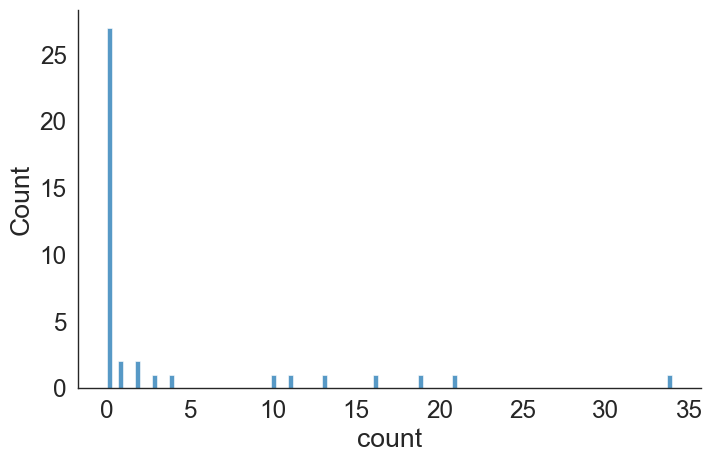

In [114]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=gun_count, x="count", kind="hist", bins = 100, aspect = 1.5)

In [115]:
gun_count_distri= gun_count["count"].values

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.91it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.633432,1826.537573,-113.172326,inf,0.675000,1.495682e-18
gamma,2.388430,1082.682640,-101.663092,inf,0.674948,1.506949e-18
lognorm,3.084166,1119.048645,-91.437283,inf,0.675000,1.495682e-18
norm,3.859160,1104.434269,-86.159433,inf,0.354046,5.439276e-05
burr,4.033304,11776.652756,-77.016220,inf,0.589601,8.972493e-14


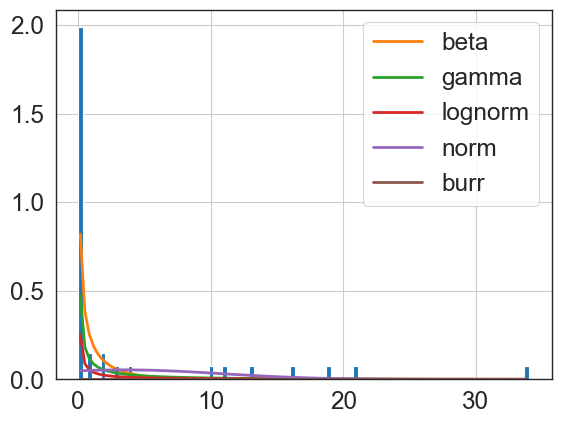

In [116]:
f = Fitter(gun_count_distri,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [117]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.4265655191088863,
  'b': 138.74214141073514,
  'loc': -2.616764511321398e-30,
  'scale': 372.3800182159812}}

In [118]:
f.fitted_param["beta"]

(0.4265655191088863,
 138.74214141073514,
 -2.616764511321398e-30,
 372.3800182159812)

In [133]:
# Fit distribution for food

In [134]:
foodlink_data = pd.read_csv('foodlink_data.csv')
roc_zip = list(range(14604, 14624))
roc_zip.append(14626)
roc_zip.append(14627)
roc_zip.append(14642)

# create subset of foodlink_data df called roc_foodlink_data, which only includes tuples in Rochester zip codes
roc_foodlink_data = foodlink_data.loc[foodlink_data['Zip Code'].isin(roc_zip)]

In [135]:
roc_foodlink_data

,Zip Code,Latitude (generated),Longitude (generated),Food Insecurity2
124,14626,43.2141,-77.7135,0.094
127,14623,43.0881,-77.6425,0.167
128,14622,43.2138,-77.5569,0.080
129,14621,43.1863,-77.6018,0.298
130,14620,43.1291,-77.6065,0.187
131,14619,43.1363,-77.6493,0.281
132,14618,43.1126,-77.5555,0.077
133,14617,43.2242,-77.5951,0.073
134,14616,43.2340,-77.6550,0.106
135,14615,43.2049,-77.6550,0.190


In [136]:
zip_food = roc_foodlink_data["Zip Code"].tolist()

In [137]:
zip_noinclude_2 = list(set(allzip) - set(zip_food))

In [138]:
zip_noinclude_2

[14602,
 14603,
 14614,
 14624,
 14625,
 14627,
 14638,
 14639,
 14642,
 14643,
 14644,
 14646,
 14647,
 14649,
 14650,
 14651,
 14652,
 14653,
 14692,
 14694]

In [139]:
for i in range(len(zip_noinclude_2)):
    roc_foodlink_data = roc_foodlink_data.append({'Zip Code': zip_noinclude_2[i], 'Food Insecurity2': 0}, ignore_index=True)

C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\2257363787.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_foodlink_data = roc_foodlink_data.append({'Zip Code': zip_noinclude_2[i], 'Food Insecurity2': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\2257363787.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_foodlink_data = roc_foodlink_data.append({'Zip Code': zip_noinclude_2[i], 'Food Insecurity2': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Temp\ipykernel_23852\2257363787.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  roc_foodlink_data = roc_foodlink_data.append({'Zip Code': zip_noinclude_2[i], 'Food Insecurity2': 0}, ignore_index=True)
C:\Users\yujun\AppData\Local\Te

In [140]:
roc_foodlink_data

,Zip Code,Latitude (generated),Longitude (generated),Food Insecurity2
0,14626,43.2141,-77.7135,0.094
1,14623,43.0881,-77.6425,0.167
2,14622,43.2138,-77.5569,0.080
3,14621,43.1863,-77.6018,0.298
4,14620,43.1291,-77.6065,0.187
5,14619,43.1363,-77.6493,0.281
6,14618,43.1126,-77.5555,0.077
7,14617,43.2242,-77.5951,0.073
8,14616,43.2340,-77.6550,0.106
9,14615,43.2049,-77.6550,0.190


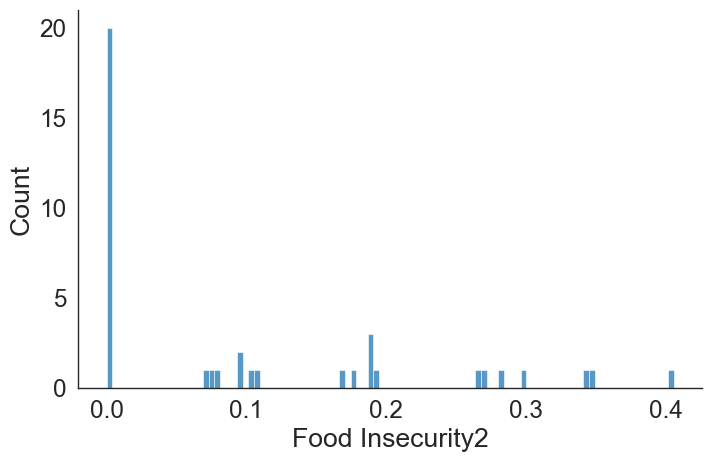

In [141]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=roc_foodlink_data, x="Food Insecurity2", kind="hist", bins = 100, aspect = 1.5)

In [142]:
Food_Insecurity = roc_foodlink_data["Food Insecurity2"].values

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  5.00it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,7184.132108,321.264699,218.696660,inf,0.500000,9.006443e-10
burr,10583.769736,109.655172,237.883418,inf,0.499781,9.188860e-10
lognorm,11716.295673,267.401501,238.260898,inf,0.499932,9.062610e-10
beta,12634.657801,-121.102548,244.968297,inf,0.500000,9.006442e-10
norm,15602.881395,-66.184930,246.031016,inf,0.292109,1.615107e-03


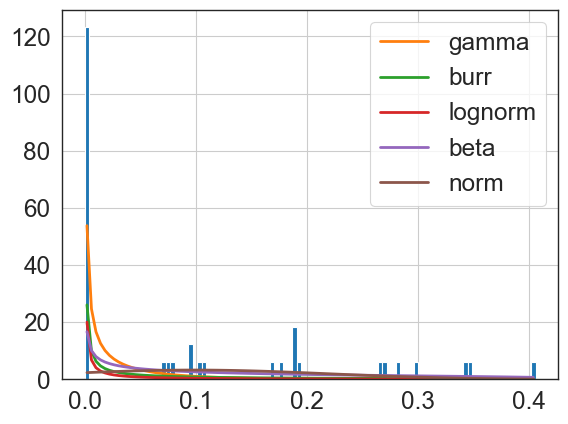

In [143]:
f = Fitter(Food_Insecurity,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [144]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 0.3410428082378939,
  'loc': -4.968219586104882e-28,
  'scale': 0.0736889976810686}}

In [145]:
f.fitted_param["gamma"]

(0.3410428082378939, -4.968219586104882e-28, 0.0736889976810686)